Load Labraries:

In [11]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

Load the data:

In [12]:
cab_df = pd.read_csv("Cab_Data.csv")
city_df = pd.read_csv("City.csv")
customer_df = pd.read_csv("Customer_ID.csv")
transaction_df = pd.read_csv("Transaction_ID.csv")

In [13]:
cab_df.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [14]:
cab_df['Transaction ID'].unique().shape

(359392,)

In [15]:
cab_df.shape

(359392, 7)

In [16]:
import datetime
cab_df["Date"] = cab_df["Date of Travel"].apply( lambda x : datetime.datetime(1899, 12, 30) + datetime.timedelta(days=x) )
#converting the date format into standard date format
#cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'], format='%d-%m-%Y')
#cab_df['Year'] = cab_df['Date of Travel'].dt.year   
#cab_df['Month'] = cab_df['Date of Travel'].dt.month

#cab_df["day"] = pd.to_datetime(cab_df.date, format = "%d/%m/%Y").dt.day

cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-03


cab_df data is describing transactions of : Companies, Km travelled, price charged etc.

In [17]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


city_df Data : Consists of various cities, their populations and number of users.(just 5 cities)

In [18]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


customer_df data : consists of uniques customer ids with their ages and income.

In [19]:
transaction_df.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [20]:
transaction_df.shape

(440098, 3)

transaction_df id data : Consists of unique Transaction Ids with the payment mode.
As we can see, transaction_df is connected to customer_df(Customer ID) and cad_df(Transaction ID).

In [21]:
cab_df.info()
city_df.info()
customer_df.info()
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  int64         
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Date            359392 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 21.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users      

Plots to understand the data more:

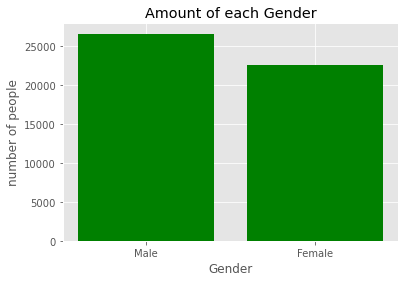

In [22]:
plt.style.use('ggplot')

gender = customer_df["Gender"].unique()
num_ppl = customer_df['Gender'].value_counts()

x_p = [i for i, _ in enumerate(gender)]

plt.bar(x_p, num_ppl, color='green')
plt.xlabel("Gender")
plt.ylabel("number of people")
plt.title("Amount of each Gender")

plt.xticks(x_p, gender)

plt.show()

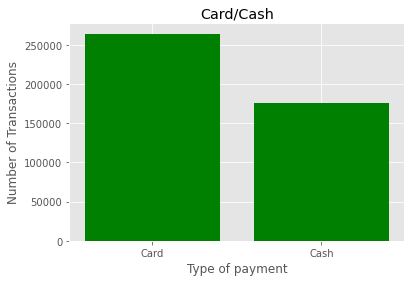

In [23]:
plt.style.use('ggplot')

payment = transaction_df['Payment_Mode'].unique()
num_pay = transaction_df['Payment_Mode'].value_counts()

x_p = [i for i, _ in enumerate(gender)]

plt.bar(x_p, num_pay, color='green')
plt.xlabel("Type of payment")
plt.ylabel("Number of Transactions")
plt.title("Card/Cash")

plt.xticks(x_p, payment)

plt.show()

In [24]:
city_df['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

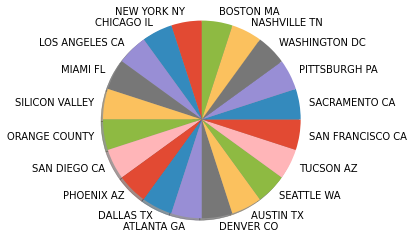

In [25]:
labels = city_df['City'].unique()
sizes = city_df['City'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=None, labels=labels, 
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [26]:
tran_cus_df = pd.merge(transaction_df, customer_df, on='Customer ID')

In [27]:
tran_cus_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [28]:
tran_cus_df.shape

(440098, 6)

In [29]:
all_merged_df = pd.merge(tran_cus_df, cab_df, on='Transaction ID')
all_merged_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21


In [30]:
all_merged_df.shape

(359392, 13)

In [40]:
#converting the date format into standard date format
all_merged_df['Year'] = all_merged_df['Date'].dt.year
all_merged_df['Month'] = all_merged_df['Date'].dt.month
all_merged_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Profit,Month
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,57.3150,1
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,281.2772,7
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,194.6480,11
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,23.6660,1
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,2018,253.9808,4


In [32]:
all_merged_df['Profit'] = all_merged_df['Price Charged'] - all_merged_df['Cost of Trip']
all_merged_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Profit
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,57.3150
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,281.2772
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,194.6480
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,23.6660
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,2018,253.9808


<AxesSubplot:title={'center':'Yearly profit by company'}, xlabel='Year'>

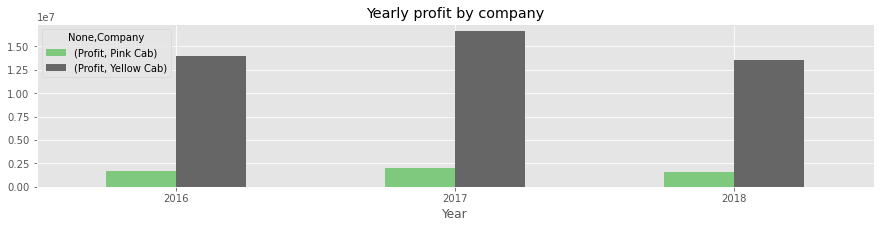

In [48]:
all_merged_df.pivot_table(
    values = ['Profit'],
    index = ['Year'],
    columns = ['Company'],
    aggfunc = np.sum ).plot( kind = 'bar', rot=0, figsize=(15,3), colormap='Accent', title ='Yearly profit by company')

<AxesSubplot:title={'center':'KM Travelled frequency by company'}, xlabel='Year'>

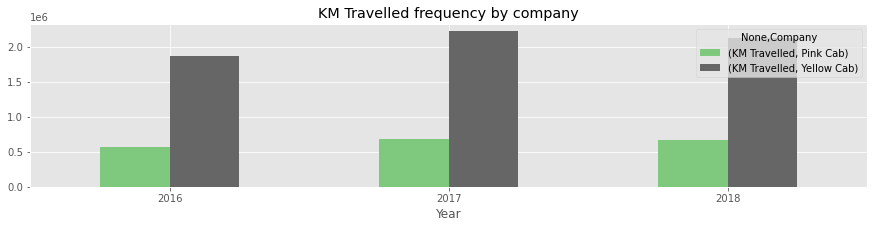

In [47]:
all_merged_df.pivot_table(
    values = ['KM Travelled'],
    index = ['Year'],
    columns = ['Company'],
    aggfunc = np.sum ).plot( kind = 'bar', rot=0, figsize=(15,3), colormap='Accent', title ='KM Travelled frequency by company')

Is the income growth affect the number of Taxi?

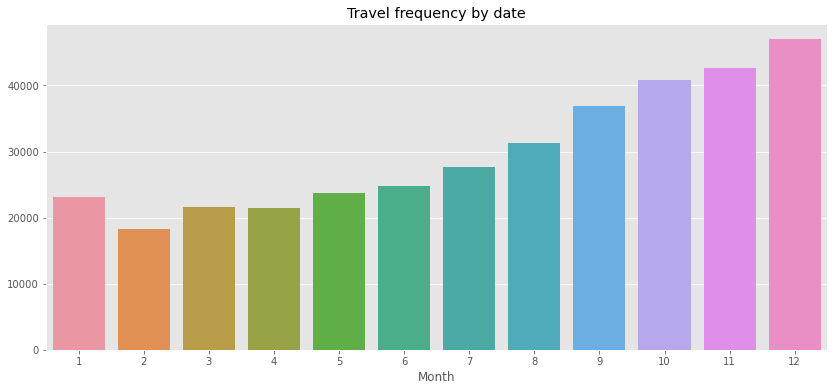

In [45]:
freq_month_plot = all_merged_df.groupby(['Month']).Date.count()
plt.figure(figsize=(14,6))
sns.barplot(x=freq_month_plot.index,y=freq_month_plot.values)
plt.title('Travel frequency by date')
plt.show()

Age:

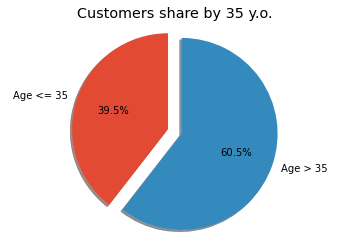

In [59]:
plot_age = all_merged_df.groupby('Age').Date.nunique()

#plot = all_merged_df.groupby('Company').Age.mean()
labels = 'Age <= 35','Age > 35'
pct = [plot_age[plot_age.index<=35].values.sum(),plot_age[plot_age.index>35].values.sum()]
explode = (0.15,0)
fig1, ax1 = plt.subplots()
ax1.pie(pct , explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Customers share by 35 y.o.')
plt.show()